# SC12x

## 데이터 탐색 및 가설 검정

이번 SC 에서 여러분은 가상의 마케팅 데이터를 활용한 통계 분석을 진행하시게 됩니다. 

## 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다룹니다. 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**
> 2,240 customers of XYZ company:

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)
- Country - 고객의 국적

## Part 1 - 데이터 불러오기

### 1) 데이터셋을 업로드합니다

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 이 곳에 답안을 작성하십시오

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/DS_camp/sc12x_dataset.csv'
df = pd.read_csv(filename, index_col=0)
df.head()

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,6,1,0
1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,7,5,0
2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,5,2,0
3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,2,7,0
4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,2,7,0


### 2) 결측치가 있는지 확인한 후 있다면 제거하세요

In [4]:
# 이 곳에 답안을 작성하십시오
df.isnull().sum()

ID                    0
Year_Birth            0
Country               0
Education             0
Marital_Status        0
 Income              24
Kidhome               0
Teenhome              0
Dt_Customer           0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

ID                   0
Year_Birth           0
Country              0
Education            0
Marital_Status       0
 Income              0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2216 non-null   int64 
 1   Year_Birth         2216 non-null   int64 
 2   Country            2216 non-null   object
 3   Education          2216 non-null   object
 4   Marital_Status     2216 non-null   object
 5    Income            2216 non-null   object
 6   Kidhome            2216 non-null   int64 
 7   Teenhome           2216 non-null   int64 
 8   Dt_Customer        2216 non-null   object
 9   Recency            2216 non-null   int64 
 10  MntWines           2216 non-null   int64 
 11  MntFruits          2216 non-null   int64 
 12  MntMeatProducts    2216 non-null   int64 
 13  MntFishProducts    2216 non-null   int64 
 14  MntSweetProducts   2216 non-null   int64 
 15  MntGoldProds       2216 non-null   int64 
 16  NumDealsPurchases  2216 non-null   int64 


### 3) 아래의 특성들을 만드세요

1. **TotalMntProducts** - 최근 2년간 구매한 모든 제품 가격들을 합한 값을 가진 계산한 특성입니다

2. **TotalNumPurchases** - 구매횟수를 모두 합친 값을 가진 특성입니다

3. **DaysSinceJoined** - 오늘 날짜를 기준으로 가입한 기간을 보여주는 특성입니다 

4. **VIP** - 누적 구매 금액이 $2,000 이상을 넘고, 오늘을 기준으로 가입기간이 5년 이상이 된다면 1, 아니면 0의 값을 가진 칼럼을 만듭니다

In [7]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [8]:
# 답안 작성은 이 곳에 하십시오
df['TotalMntProducts'] = df.MntWines +df.MntFruits + df.MntMeatProducts+ df.MntFishProducts	+ df.MntSweetProducts	+df.MntGoldProds
df['TotalNumPurchases'] = df.NumDealsPurchases +	df.NumWebPurchases	+ df.NumStorePurchases


In [9]:
df.head()

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalMntProducts,TotalNumPurchases
0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,6,1,0,1190,11
1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,7,5,0,577,15
2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,5,2,0,251,9
3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,2,7,0,11,4
4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,2,7,0,91,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Country            2216 non-null   object        
 3   Education          2216 non-null   object        
 4   Marital_Status     2216 non-null   object        
 5    Income            2216 non-null   object        
 6   Kidhome            2216 non-null   int64         
 7   Teenhome           2216 non-null   int64         
 8   Dt_Customer        2216 non-null   datetime64[ns]
 9   Recency            2216 non-null   int64         
 10  MntWines           2216 non-null   int64         
 11  MntFruits          2216 non-null   int64         
 12  MntMeatProducts    2216 non-null   int64         
 13  MntFishProducts    2216 non-null   int64         
 14  MntSweet

In [11]:
df.shape

(2216, 23)

In [12]:
today = pd.to_datetime('2021-09-27')

In [13]:
df['DaysSinceJoined'] = today - df.Dt_Customer
df['DaysSinceJoined'] = df['DaysSinceJoined'].dt.days
df.head()

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalMntProducts,TotalNumPurchases,DaysSinceJoined
0,1826,1970,SP,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,6,1,0,1190,11,2660
1,1,1961,CA,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,7,5,0,577,15,2661
2,10476,1958,US,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,5,2,0,251,9,2694
3,1386,1967,AUS,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,2,7,0,11,4,2696
4,5371,1989,SP,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,2,7,0,91,7,2729


In [14]:
# 다른 방법

# df["Dt_Customer"] = pd.to_datetime(df['Dt_Customer'])
# df['DaysSinceJoined'] = (pd.Timestamp.today() - df['Dt_Customer'])

In [15]:
df.shape

(2216, 24)

In [16]:
for i in range(2216):
  if (df.iloc[i].TotalMntProducts > 2000) & (df.iloc[i].DaysSinceJoined > 1825):
    df['VIP'] = 1
  else:
    df['VIP'] = 0

In [17]:
for i in range(2216):
  if (df.iloc[i].TotalMntProducts > 2000) & (df.iloc[i].DaysSinceJoined > 1825):
    df['VIP'][i] = 1
  else:
    df['VIP'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# 데이터프레임 조건 추출을 사용한 방법
# df.loc[((df['TotalMntPurchases'] >= 2000) & (df['DaysSinceJoined'] >= pd.Timedelta("1825 days"))), 'VIP'] = True
# df.loc[~((df['TotalMntPurchases'] >= 2000) & (df['DaysSinceJoined'] >= pd.Timedelta("1825 days"))), 'VIP'] = False

In [19]:
df.VIP.sum() # VIP 고객은 총 50명이다.

50

## Part 2 - 가설 검정

### Hypothesis Test    
   - 수치형 (numerical/continuous) 칼럼이 어떤 차이를 보이는지 t-test를 통해 가설을 세우고 검증하세요. (최소 2개)
   - 범주형 (categorical) 칼럼이 어떤 차이를 보이는지 $\chi^2-test$를 통해 가설을 세우고 검증하세요. (최소 2개)  
  **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다. 그리고 [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)를 사용하면 $\chi^2$ statistics 를 계산할 수 있습니다.    

In [20]:
# 답안 작성은 이 곳에 하십시오
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Country            2216 non-null   object        
 3   Education          2216 non-null   object        
 4   Marital_Status     2216 non-null   object        
 5    Income            2216 non-null   object        
 6   Kidhome            2216 non-null   int64         
 7   Teenhome           2216 non-null   int64         
 8   Dt_Customer        2216 non-null   datetime64[ns]
 9   Recency            2216 non-null   int64         
 10  MntWines           2216 non-null   int64         
 11  MntFruits          2216 non-null   int64         
 12  MntMeatProducts    2216 non-null   int64         
 13  MntFishProducts    2216 non-null   int64         
 14  MntSweet

In [21]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,TotalMntProducts,TotalNumPurchases,DaysSinceJoined,VIP
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,5.800993,5.319043,0.009477,607.075361,12.209838,3000.521209,0.022563
std,3249.376275,11.985554,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,3.250785,2.425359,0.096907,602.900476,5.861202,202.434667,0.148540
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2647.000000,0.000000
25%,2814.750000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,3.000000,3.000000,0.000000,69.000000,7.000000,2827.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,5.000000,6.000000,0.000000,396.500000,12.000000,3002.500000,0.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,8.000000,7.000000,0.000000,1048.000000,17.000000,3176.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,13.000000,20.000000,1.000000,2525.000000,33.000000,3346.000000,1.000000


#가설 1: 고객들은 2년동안 평균 총 15달러를 지출하였을 것이다.

In [22]:
from scipy import stats

In [23]:
test1 = stats.ttest_1samp(df['TotalNumPurchases'], 15)
pv1 = test1.pvalue
pv1

2.0468170899304201e-100

## 평균에 대한 One sample T test 수행 결과 p-value가 0에 가깝게 나왔기 때문에 귀무가설을 기각한다. 즉 고객들은 2년동안 평균 15달러를 지출하지 않았다.

기준값을 12.2로 두고 검정을 수행하면 p-value의 값이 충분히 크게 나와 기초통계량의 mean값인 12.2과 비교했을 때 고객들은 평균적으로 12달러를 지출했음을 알 수 있다.

# 가설 2: 고객들의 회사 웹사이트를 통해 구매한 횟수의 평균과 직접 방문하여 구매한 횟수의 평균은 같을 것이다.

In [24]:
buy1 = df['NumWebPurchases']
buy2 = df['NumStorePurchases']

test2 = stats.ttest_ind(buy1, buy2)
pv2 = test2.pvalue
pv2

2.103546667549773e-77

## Two sample T test 검정 결과 p-value의 값이 0에 가깝게 충분히 작게 나왔기 때문에 고객들의 웹사이트 방문 구매 횟수의 평균과 직접 방문 구매 횟수의 평균은 통계적으로 같지 않다. 따라서 귀무가설을 기각한다.

# 가설 3: 고객별 할인을 통해 제품을 구매한 횟수의 차이가 없을 것이다.

In [25]:
from scipy.stats import chisquare
chi1 = chisquare(df['NumDealsPurchases'], axis=None)
chi1

Power_divergenceResult(statistic=3527.7869489221202, pvalue=1.2402335913682922e-63)

## One sample 카이제곱 검정 결과 p-value의 값이 0에 가까운 수로 나왔기 때문에 고객별 할인을 통해 제품을 구해만 횟수에는 통계적으로 유의미한 차이가 있다고 할 수 있다. 따라서 귀무가설을 기각한다.

# 가설 4: 고객의 학력에 따른 와인 구매액의 차이가 없을 것이다.

In [26]:
chi_data = pd.crosstab(df['Education'], df['MntWines'])
chi_data

MntWines,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1181,1184,1193,1200,1205,1206,1215,1218,1224,1230,1239,1241,1245,1248,1252,1253,1259,1276,1279,1285,1288,1296,1298,1302,1308,1311,1315,1324,1332,1349,1379,1394,1396,1449,1459,1462,1478,1486,1492,1493
Education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2n Cycle,4,6,9,3,6,7,4,3,7,3,4,5,7,2,0,2,2,0,0,1,1,1,2,2,1,1,1,1,1,0,2,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basic,6,16,10,3,5,2,4,3,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Graduation,3,15,20,21,18,22,19,10,13,14,16,11,12,8,13,11,8,5,12,8,4,2,10,9,7,8,1,5,5,8,7,4,6,4,6,3,3,2,2,5,...,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,2,0
Master,0,0,2,3,1,3,6,3,7,6,0,2,5,2,4,3,3,2,3,3,0,1,1,3,2,1,3,2,2,3,5,2,0,1,3,2,1,3,1,2,...,0,2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
PhD,0,0,1,0,3,3,4,2,2,4,3,4,1,2,7,6,3,2,3,8,6,2,3,3,2,2,5,3,2,3,2,1,1,1,0,4,0,3,5,1,...,3,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,0,3,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,2,0,0,1


In [27]:
from scipy.stats import chi2_contingency
chi2_contingency(chi_data)

(3232.9231492063927,
 0.04716161556521954,
 3100,
 array([[ 1.1732852 ,  3.33935018,  3.79061372, ...,  0.09025271,
          0.18050542,  0.09025271],
        [ 0.316787  ,  0.90162455,  1.0234657 , ...,  0.02436823,
          0.04873646,  0.02436823],
        [ 6.54693141, 18.63357401, 21.15162455, ...,  0.50361011,
          1.00722022,  0.50361011],
        [ 2.14124549,  6.09431408,  6.91787004, ...,  0.16471119,
          0.32942238,  0.16471119],
        [ 2.8217509 ,  8.03113718,  9.11642599, ...,  0.21705776,
          0.43411552,  0.21705776]]))

카이제곱 검정 결과 p-value의 값이 0.047로, 유의도를 0.05로 설정했을 경우 아슬아슬하게 귀무가설을 기각할 수 있다.

# 가설 5: 

In [28]:
chi_data2 = pd.crosstab(df['Marital_Status'], df['MntGoldProds'])
chi2_contingency(chi_data2)

(2790.9265721929796,
 9.960372720104305e-84,
 1477,
 array([[5.50541516e-02, 6.40794224e-02, 5.59566787e-02, ...,
         9.02527076e-04, 9.02527076e-04, 9.02527076e-04],
        [8.25812274e-02, 9.61191336e-02, 8.39350181e-02, ...,
         1.35379061e-03, 1.35379061e-03, 1.35379061e-03],
        [6.38628159e+00, 7.43321300e+00, 6.49097473e+00, ...,
         1.04693141e-01, 1.04693141e-01, 1.04693141e-01],
        ...,
        [1.57730144e+01, 1.83587545e+01, 1.60315884e+01, ...,
         2.58574007e-01, 2.58574007e-01, 2.58574007e-01],
        [2.09205776e+00, 2.43501805e+00, 2.12635379e+00, ...,
         3.42960289e-02, 3.42960289e-02, 3.42960289e-02],
        [5.50541516e-02, 6.40794224e-02, 5.59566787e-02, ...,
         9.02527076e-04, 9.02527076e-04, 9.02527076e-04]]))

카이제곱 검정 결과 p-value가 0에 가깝게 충분히 작으므로 귀무가설을 기각한다.

## Part 3 - Analysis and Interpretation

자, 위 파트들에서 우리는 데이터들을 잘 관찰했습니다. 다음의 질문들에 텍스트로 답변하십시오.  

1) 여러분들이 수행한 두 개 이상의 t-test 들을 해석하고 설명해 보세요.
2) 여러분들이 수행한 두 개 이상의 $\chi^2$ test 들을 해석하고 설명해 보세요.

** `답안 작성은 이 곳에 하십시오` **

1. 평균에 대한 One sample T test 수행 결과 p-value가 0에 가깝게 나왔기 때문에 귀무가설을 기각한다. 즉 고객들은 2년동안 평균 15달러를 지출하지 않았다.
기준값을 12.2로 두고 검정을 수행하면 p-value의 값이 충분히 크게 나와 기초통계량의 mean값인 12.2과 비교했을 때 고객들은 평균적으로 12달러를 지출했음을 알 수 있다.

2. Two sample T test 검정 결과 p-value의 값이 0에 가깝게 충분히 작게 나왔기 때문에 고객들의 웹사이트 방문 구매 횟수의 평균과 직접 방문 구매 횟수의 평균은 통계적으로 같지 않다. 따라서 귀무가설을 기각한다. 직접 방문을 통한 구매 횟수 평균이 13회, 웹사이트를 통한 구매 횟수 평균이 20회로, 유의미한 차이를 보이기 때문에 회사는 이를 참고하여 웹사이트 관련 프로모션을 진행하거나 세일즈 프랜을 수립하여 수익성 증가를 기대할 수 있다. 

3. One sample 카이제곱 검정 결과 p-value의 값이 0에 가까운 수로 나왔기 때문에 고객별 할인을 통해 제품을 구해만 횟수에는 통계적으로 유의미한 차이가 있다고 할 수 있다. 따라서 귀무가설을 기각한다. 고객들이 일괄적으로 할인을 이용한다거나, 할인 없이 구매한다거나 하지 않고 차이를 보이므로, 할인을 이용하는 고객들과 이용하지 않는 고객을 분리, 개별 타게팅 하여 마케팅 방법을 다르게 적용할 수 있다.

4. 카이제곱 검정 결과 p-value의 값이 0.047로, 유의도를 0.05로 설정했을 경우 겨우 귀무가설을 기각하고 대립가설을 채택할 수 있다. 하지만 그 값이 애매하므로 고객의 학력에 따른 와인 구매액의 차이는 더 세밀한 연구가 필요하다고 할 수 있다.

5. 카이제곱 검정 결과 p-value의 값이 0과 가깝게 매우 작으므로 귀무가설을 기각할 수 있다. 따라서 고객의 결혼 상태 유무에 따른 황금 제품 구매액에는 차이가 있다고 할 수 있다.

# Advanced Goals: 
> SC 에서 3점을 얻고 싶으시다면 아래의 문제를 모두 풀어주세요. 다만 2점을 얻었다면 충분합니다. 시간과 여유가 있는 분들만 도전해 보시기 바랍니다. 

## Part 1: 

여러분들의 dataframe column들이 적절한 data type을 가지도록 작업해 보세요.   
**Hint:** 특정 column datatype 이 float 이나 integer 로 되어있음에도 불구하고 "object" 라고 되어 있는 경우가 있습니다. 이 경우, `pd.to_numeric()`, `pd.to_datetime()` 과 같은 방법으로 칼럼들을 변환해 보세요. 
주석을 통해 읽는 이가 쉽게 읽을 수 있고, 전체 내용을 쉽게 따라갈 수 있다면 3점을 얻을 수 있습니다. 

## Part 2:

데이터 셋의 적절한 column들의 조합으로 $t-test$와 $\chi^2 test$가 쉽게 수행될 수 있도록 함수를 작성해 보세요.
**데이터 타입에 알맞은 가설검정이 실행되야 하는 것을 잊지 마세요**

## Part 3: 
평균 추정치에 대한 신뢰 구간(confidence interval)을 계산하고 결과를 작성하세요 (최소 두 개 선택). 계산한 추정치가 얼마나 정확한지 시각적으로 확인할 수 있도록 matplotlib, seaborn 등의 시각화 라이브러리를 활용해서 나타내세요

In [29]:
# 각 파트가 잘 구분되어질 수 있도록 해 주세요

In [30]:
### 이곳에 Part 1 답안을 작성해주시기 바랍니다
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Country            2216 non-null   object        
 3   Education          2216 non-null   object        
 4   Marital_Status     2216 non-null   object        
 5    Income            2216 non-null   object        
 6   Kidhome            2216 non-null   int64         
 7   Teenhome           2216 non-null   int64         
 8   Dt_Customer        2216 non-null   datetime64[ns]
 9   Recency            2216 non-null   int64         
 10  MntWines           2216 non-null   int64         
 11  MntFruits          2216 non-null   int64         
 12  MntMeatProducts    2216 non-null   int64         
 13  MntFishProducts    2216 non-null   int64         
 14  MntSweet

눈에띄는 컬럼은 Income 으로, object인데 수치화하면 분석에 도움이 될 것이다. datetime 데이터타입은 위에서 처리하였다.

In [31]:
df[' Income '] = df[' Income '].str.replace(pat=r'[^\w]', repl=r'', regex=True) # 정규표현식을 사용하여 [ , ] , ! , & 등 특수문자들을 전부 제거한다.
df[' Income '] = df[' Income '].astype(int) # 숫자만 남았으므로 정수형 자료형으로 변환한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2216 non-null   int64         
 1   Year_Birth         2216 non-null   int64         
 2   Country            2216 non-null   object        
 3   Education          2216 non-null   object        
 4   Marital_Status     2216 non-null   object        
 5    Income            2216 non-null   int64         
 6   Kidhome            2216 non-null   int64         
 7   Teenhome           2216 non-null   int64         
 8   Dt_Customer        2216 non-null   datetime64[ns]
 9   Recency            2216 non-null   int64         
 10  MntWines           2216 non-null   int64         
 11  MntFruits          2216 non-null   int64         
 12  MntMeatProducts    2216 non-null   int64         
 13  MntFishProducts    2216 non-null   int64         
 14  MntSweet

np.issubdtype(arg1, arg2) :

인자로 받는 변수의 타입이

arg1이 arg2에 포함되면 True를,

포함되지 않으면 False를 리턴함

즉 아래 함수에서는 데이터프레임의 데이터타입이 숫자면 True,

숫자가 아니면 False 반환

In [32]:
### 이곳에 Part 2 답안을 작성해주시기 바랍니다

def which_test_by_dtypes(df1, df2):
    
    # 사용자 지정 함수 영역 내에서 라이브러리 import
    import numpy as np
    from scipy.stats import ttest_ind, chi2_contingency
        
    # t-test    
    if (np.issubdtype(df1.dtype, np.number)) & (np.issubdtype(df2.dtype, np.number)):
        return ttest_ind(df1, df2)
    
    # chi-square
    else :
        cross = pd.crosstab(df1, df2)
        return chi2_contingency(cross)[:2]


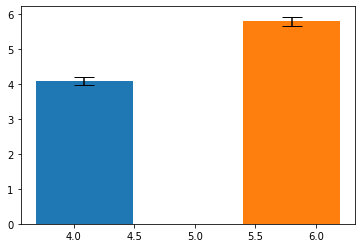

In [33]:
### 이곳에 Part 3 답안을 작성해주시기 바랍니다

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])


# 컬럼 별 평균 계산
col1_mean, col2_mean = np.mean(df['NumWebPurchases']), np.mean(df['NumStorePurchases'])


# 컬럼 별 신뢰구간 계산
def confidence_interval(data, confidence = 0.95):
    
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)

    stderr = stats.sem(data) 

    interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1)
    return (mean - interval, mean + interval)

col1_confidence = confidence_interval(df['NumWebPurchases'])
col2_confidence = confidence_interval(df['NumStorePurchases'])


# plot 생성
plt.bar(x=col1_mean, height=col1_mean, yerr=col1_confidence[0]-col1_mean, capsize=10)
plt.bar(x=col2_mean, height=col2_mean, yerr=col2_confidence[0]-col2_mean, capsize=10)

# plot 보여주기
plt.show()